In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')

In [3]:
## create dataframe of csv
df = pd.DataFrame(data)


In [4]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.shape

(11914, 16)

In [7]:
##checking for duplicate values
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (715, 16)


In [8]:
## removing dupicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates: ", df.shape)

Number of rows after removing duplicates:  (11199, 16)


In [9]:
## checking for null values
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [10]:
## removing null values - drop not available
df = df.dropna()

In [11]:
## checking for null values
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


In [12]:
df.shape

(7735, 16)

In [13]:
df.count()

Make                 7735
Model                7735
Year                 7735
Engine Fuel Type     7735
Engine HP            7735
Engine Cylinders     7735
Transmission Type    7735
Driven_Wheels        7735
Number of Doors      7735
Market Category      7735
Vehicle Size         7735
Vehicle Style        7735
highway MPG          7735
city mpg             7735
Popularity           7735
MSRP                 7735
dtype: int64

<Axes: xlabel='Engine HP'>

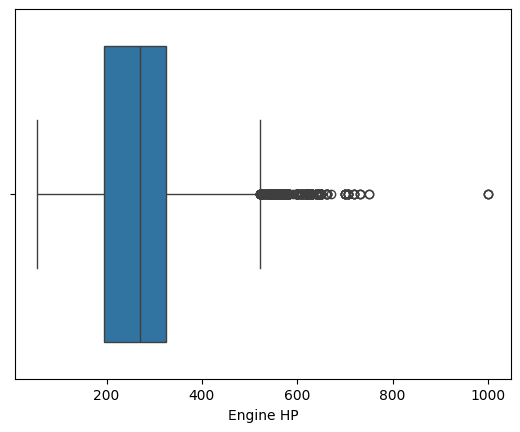

In [14]:
sns.boxplot(x=df['Engine HP'])

In [15]:
Q1 = df['Engine HP'].quantile(0.25)
Q3 = df['Engine HP'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

131.0


In [18]:
#combine 2 columns into one
df['new_column'] = df['highway MPG'] + df['city mpg']

In [19]:
print(df['new_column'])

0        45
1        47
2        48
3        46
4        46
         ..
11909    39
11910    39
11911    39
11912    39
11913    43
Name: new_column, Length: 7735, dtype: int64


In [21]:
##aplying custom function using appy()
def get_price_category(price):
    if price < 20000:
        return 'Budget'
    elif 20000 <= price < 50000:
        return 'Mid-Range'
    else:
        return 'Luxury'



In [23]:
df['price_category'] = df['MSRP'].apply(get_price_category)

In [24]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,new_column,price_category
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,45,Mid-Range
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,47,Mid-Range
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,48,Mid-Range
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,46,Mid-Range
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,46,Mid-Range


In [26]:
## data aggrigagtion and grouping
grouped_data = df.groupby('Make').agg({'MSRP': 'mean', 'Engine HP': 'max'}).reset_index()
print(grouped_data)

             Make          MSRP  Engine HP
0           Acura  3.508749e+04      573.0
1      Alfa Romeo  6.160000e+04      237.0
2    Aston Martin  1.981235e+05      568.0
3            Audi  5.457412e+04      610.0
4             BMW  6.216256e+04      600.0
5         Bentley  2.471693e+05      631.0
6         Bugatti  1.757224e+06     1001.0
7           Buick  3.377040e+04      310.0
8        Cadillac  5.636827e+04      640.0
9       Chevrolet  3.597082e+04      650.0
10       Chrysler  2.997887e+04      385.0
11          Dodge  3.118680e+04      707.0
12           FIAT  2.237066e+04      180.0
13        Ferrari  2.373838e+05      731.0
14           Ford  3.363895e+04      662.0
15            GMC  3.738575e+04      420.0
16        Genesis  4.661667e+04      420.0
17         HUMMER  3.646441e+04      300.0
18          Honda  2.697087e+04      280.0
19        Hyundai  2.727432e+04      429.0
20       Infiniti  4.264027e+04      420.0
21            Kia  3.014931e+04      420.0
22    Lambo